In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

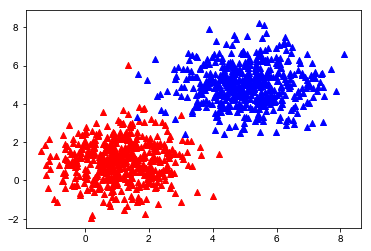

(500, 2)


In [3]:
size = 500

mean_1 = np.array([1, 1])
cov_1 = np.array([[1, 0.1], [0.1, 1.2]])

mean_2 = np.array([5, 5])
cov_2 = np.array([[1.2, 0.1], [0.1, 1]])

dist_1 = np.random.multivariate_normal(mean_1, cov_1, size)
dist_2 = np.random.multivariate_normal(mean_2, cov_2, size)

plt.scatter(dist_1[:,0],dist_1[:,1], marker = '^', c = 'red')
plt.scatter(dist_2[:,0],dist_2[:,1], marker = '^', c = 'blue')

plt.style.use('seaborn')

plt.show()
print(dist_1.shape)

## Creating training dataset

In [17]:
data = np.zeros((size * 2, 3))
print(data.shape)

data[:size, :2] = dist_1
data[size:, :2] = dist_2
data[size:, -1] = 1

np.random.shuffle(data)

print(data[:5,:])

(1000, 3)
[[5.03039291 4.27290708 1.        ]
 [5.80242648 4.23827333 1.        ]
 [4.17644643 3.59409646 1.        ]
 [5.58224246 3.09444561 1.        ]
 [0.53073879 0.67688693 0.        ]]


In [18]:
split = int(0.8 * data.shape[0])

X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


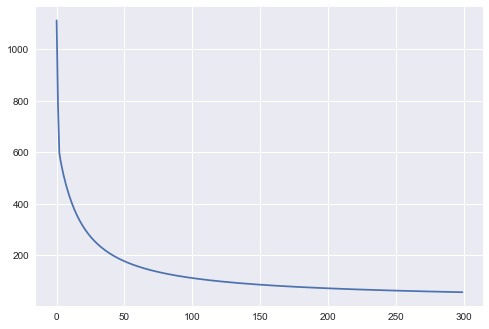

57.43562645350874


In [19]:
def hypothesis(x,w,b):
    h = np.dot(x,w) + b
    return sigmoid(h)


def sigmoid(z):
    return 1/(1 + np.exp(-1*z))


def error(y, x, w, b):
    m = x.shape[0]
    err = 0
    for i in range(m):
        
        hx = hypothesis(x[i], w, b)
        err += y[i] * np.log2(hx) + (1 - y[i]) * np.log2(1 - hx)

    return -err


def get_grads(y, x, w, b):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i], w, b)
        
        grad_w += (y[i] - hx) * x[i]
        grad_b += (y[i] - hx)
        
    grad_w/=m
    grad_b/=m
    
    return [grad_w,grad_b]

def grad_descent(x, y, w, b, learning_rate):
    
    err = error(y, x, w, b)
    [grad_w, grad_b] = get_grads(y, x, w, b)
    
    w = w + learning_rate * grad_w
    b = b + learning_rate * grad_b
    
    return err, w, b

def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence < 0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

err = []
acc = []

w = np.random.random((X_train.shape[1], ))
b = np.random.random()

for i in range(300):
    e, w, b = grad_descent(X_train, Y_train, w, b, learning_rate = 0.5)
    acc.append(get_acc(X_test, Y_test, w, b))
    err.append(e)

plt.plot(err)
plt.show()
print(err[-1])

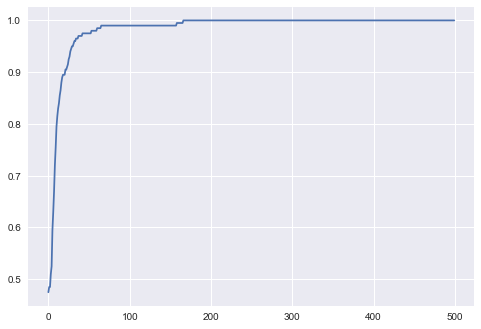

1.0


In [30]:
plt.plot(acc)
plt.show()
print(acc[-1])

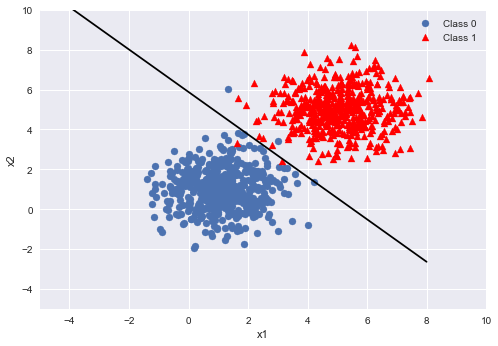

In [20]:
plt.figure(0)

plt.scatter(dist_1[:,0],dist_1[:,1],label='Class 0')
plt.scatter(dist_2[:,0],dist_2[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(w[0]*x + b)/w[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()